<a href="https://colab.research.google.com/github/garcialvarez/GasEmissions/blob/main/99%20-%20modelo%20soluci%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Modelo Solucion
En este Notebook realizamos la carga de los archivos .csv, con el preprocesado ya listo, y con la sumisión a los nuevos preprocesados

In [ ]:
!pip install seaborn
!pip install plotly

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 13.7 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 277.3 MB/s eta 0:00:00a 0:00:01


In [ ]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 252.7 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.1/47.1 kB 232.3 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_validate, ShuffleSplit, KFold, cross_val_score

# Libreria para transformar los datos
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Seaborn: Libreria para la visualización de datos
import seaborn as sns

## Carga de datos
Lo que se hizo fue generar un archivo .csv en el Notebook anterior para realizar el preprocesamiento a los datos, y cargar los datos ya procesados en un Notebook distinto

In [ ]:
train = pd.read_csv('trainP3.csv')
test = pd.read_csv('testP3.csv')

In [ ]:
train.shape, test.shape

((692500, 90), (296786, 90))

In [ ]:
X = train.drop('RENDIMIENTO_GLOBAL', axis=1)  # features
y = train['RENDIMIENTO_GLOBAL']  # target
X_test = test.drop(['ID'],axis=1)

In [ ]:
X.head()

,FAMI_TIENEINTERNET,FAMI_TIENEAUTOMOVIL,ESTU_PAGOMATRICULAPROPIO,FAMI_TIENECOMPUTADOR,"('2018',)","('2019',)","('2020',)","('2021',)","('ADMINISTRACION',)","('AGRONOMIA',)",...,"('Educación profesional completa',).1","('Educación profesional incompleta',).1","('No Aplica',).1","('Postgrado',).1","('Primaria completa',).1","('Primaria incompleta',).1","('Secundaria (Bachillerato) completa',).1","('Secundaria (Bachillerato) incompleta',).1","('Técnica o tecnológica completa',).1","('Técnica o tecnológica incompleta',).1"
0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
np.unique(y)

array([0., 1., 2., 3.])

In [ ]:
np.unique(X)

array([0., 1.])

## Particionar los datos

In [ ]:
from sklearn.model_selection import train_test_split

test_size = 0.3
val_size  = test_size/(1-test_size) # Elementos de validación

print (X.shape, y.shape)
print ("test size %.2f"%test_size)
print ("val size is %.2f (relative to %.2f) "%(val_size, 1-test_size))

#Xtr, ytr son los datos que se usan para entrenar el modelo
#Xts, yts son los datos que usamos para medir una metrica
Xtr, Xts, ytr, yts = train_test_split(X, y, test_size=test_size)
print (Xtr.shape, Xts.shape)

(692500, 89) (692500,)
test size 0.30
val size is 0.43 (relative to 0.70) 
(484750, 89) (207750, 89)


In [ ]:
def report_cv_score(z):
    print ("test score   %.3f (±%.4f) with %d splits"%(np.mean(z["test_score"]), np.std(z["test_score"]), len(z["test_score"])))
    print ("train score  %.3f (±%.4f) with %d splits"%(np.mean(z["train_score"]), np.std(z["train_score"]), len(z["train_score"])))



In [ ]:
estimator1 = RandomForestClassifier(max_depth=12)
z1 = cross_validate(estimator1, Xtr, ytr, return_train_score=True, return_estimator=True,
                    scoring='accuracy', cv=ShuffleSplit(n_splits=5, test_size=0.3))

In [ ]:
report_cv_score(z1)

test score   0.405 (±0.0010) with 5 splits
train score  0.439 (±0.0006) with 5 splits


In [ ]:
estimator2 = CatBoostClassifier()
z2 = cross_validate(estimator2, Xtr, ytr, return_train_score=True, return_estimator=True,
                    scoring='accuracy', cv=ShuffleSplit(n_splits=5, test_size=0.3))

Learning rate set to 0.106509
0:	learn: 1.3682011	total: 134ms	remaining: 2m 13s
1:	learn: 1.3539924	total: 206ms	remaining: 1m 42s
2:	learn: 1.3424022	total: 276ms	remaining: 1m 31s
3:	learn: 1.3328062	total: 347ms	remaining: 1m 26s
4:	learn: 1.3247926	total: 415ms	remaining: 1m 22s
5:	learn: 1.3176607	total: 491ms	remaining: 1m 21s
6:	learn: 1.3118822	total: 557ms	remaining: 1m 19s
7:	learn: 1.3064696	total: 628ms	remaining: 1m 17s
8:	learn: 1.3020799	total: 696ms	remaining: 1m 16s
9:	learn: 1.2979949	total: 765ms	remaining: 1m 15s
10:	learn: 1.2947066	total: 839ms	remaining: 1m 15s
11:	learn: 1.2914172	total: 904ms	remaining: 1m 14s
12:	learn: 1.2882645	total: 984ms	remaining: 1m 14s
13:	learn: 1.2854455	total: 1.06s	remaining: 1m 14s
14:	learn: 1.2829567	total: 1.12s	remaining: 1m 13s
15:	learn: 1.2805481	total: 1.19s	remaining: 1m 13s
16:	learn: 1.2782980	total: 1.26s	remaining: 1m 12s
17:	learn: 1.2765617	total: 1.32s	remaining: 1m 12s
18:	learn: 1.2746890	total: 1.4s	remaining: 

In [ ]:
report_cv_score(z2)

test score   0.416 (±0.0009) with 5 splits
train score  0.445 (±0.0002) with 5 splits


## Eleccion Modelo
Se decide elegir el estimator 2 `CatBoostClassifier` dado que es el modelo que mejor comportamineto tiene en test, y queremos entonces enfocarnos en mejorar este modelo

In [ ]:
# Libreria para transformar los datos
from sklearn.preprocessing import StandardScaler, MinMaxScaler
X_transformed = StandardScaler().fit_transform(X)
X_minmax = MinMaxScaler().fit_transform(X)

/tmp/ipykernel_48/3149330857.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X['FAMI_TIENECOMPUTADOR'], ax=ax[0])
/tmp/ipykernel_48/3149330857.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_transformed[:, 0], ax=ax[1])
/tmp/ipykernel_48/3149330857.py:13: UserWarning: 

`distplot` is 

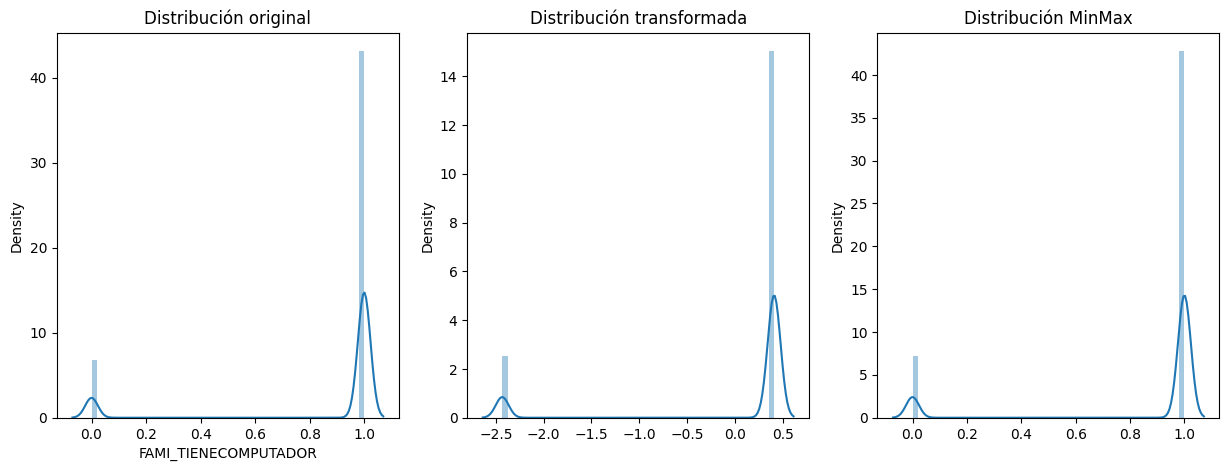

In [ ]:
import seaborn as sns

# Graficos interactivos
# Plotly: Libreria para la visualización de datos interactivos
import plotly.express as px
import plotly.subplots as sp

fig, ax = plt.subplots(1, 3, figsize=(15, 5))
sns.distplot(X['FAMI_TIENECOMPUTADOR'], ax=ax[0])
ax[0].set_title('Distribución original')
sns.distplot(X_transformed[:, 0], ax=ax[1])
ax[1].set_title('Distribución transformada')
sns.distplot(X_minmax[:, 0], ax=ax[2])
ax[2].set_title('Distribución MinMax')
plt.show()

A partir de este puntpo nos enfocamos en la trasformación de los datos, pero poniendo la prioridad en el modelo numero 2

In [ ]:

# Dividir los datos en conjunto de entrenamiento y prueba
Xtr1, Xts1, ytr1, yts1 = train_test_split(X_transformed, y, test_size=0.3, random_state=42)


In [ ]:
estimator2Trans = CatBoostClassifier()
z2T = cross_validate(estimator2Trans, Xtr1, ytr1, return_train_score=True, return_estimator=True,
                    scoring='accuracy', cv=ShuffleSplit(n_splits=3, test_size=0.3))

Learning rate set to 0.106509
0:	learn: 1.3681825	total: 90.1ms	remaining: 1m 30s
1:	learn: 1.3540507	total: 162ms	remaining: 1m 20s
2:	learn: 1.3430732	total: 232ms	remaining: 1m 17s
3:	learn: 1.3337462	total: 306ms	remaining: 1m 16s
4:	learn: 1.3258853	total: 377ms	remaining: 1m 14s
5:	learn: 1.3190895	total: 446ms	remaining: 1m 13s
6:	learn: 1.3132561	total: 513ms	remaining: 1m 12s
7:	learn: 1.3079778	total: 591ms	remaining: 1m 13s
8:	learn: 1.3031054	total: 671ms	remaining: 1m 13s
9:	learn: 1.2989371	total: 740ms	remaining: 1m 13s
10:	learn: 1.2952237	total: 812ms	remaining: 1m 13s
11:	learn: 1.2921418	total: 886ms	remaining: 1m 12s
12:	learn: 1.2891789	total: 956ms	remaining: 1m 12s
13:	learn: 1.2863903	total: 1.03s	remaining: 1m 12s
14:	learn: 1.2840779	total: 1.09s	remaining: 1m 11s
15:	learn: 1.2816382	total: 1.16s	remaining: 1m 11s
16:	learn: 1.2796521	total: 1.23s	remaining: 1m 11s
17:	learn: 1.2778245	total: 1.3s	remaining: 1m 10s
18:	learn: 1.2760357	total: 1.36s	remaining:

In [ ]:
report_cv_score(z2T)

test score   0.416 (±0.0011) with 3 splits
train score  0.445 (±0.0006) with 3 splits


## Datos transformados con MinMaxScaler()

In [ ]:
# Dividir los datos en conjunto de entrenamiento y prueba con Xminmax
Xtr2, Xts2, ytr2, yts2 = train_test_split(X_minmax, y, test_size=0.3, random_state=42)

In [ ]:
estimator2MM = CatBoostClassifier()
z2M = cross_validate(estimator2MM, Xtr2, ytr2, return_train_score=True, return_estimator=True,
                    scoring='accuracy', cv=ShuffleSplit(n_splits=3, test_size=0.3))

Learning rate set to 0.106509
0:	learn: 1.3682707	total: 85.9ms	remaining: 1m 25s
1:	learn: 1.3541150	total: 160ms	remaining: 1m 19s
2:	learn: 1.3429099	total: 234ms	remaining: 1m 17s
3:	learn: 1.3334244	total: 308ms	remaining: 1m 16s
4:	learn: 1.3254130	total: 378ms	remaining: 1m 15s
5:	learn: 1.3185416	total: 448ms	remaining: 1m 14s
6:	learn: 1.3127519	total: 514ms	remaining: 1m 12s
7:	learn: 1.3078939	total: 591ms	remaining: 1m 13s
8:	learn: 1.3033496	total: 660ms	remaining: 1m 12s
9:	learn: 1.2993259	total: 734ms	remaining: 1m 12s
10:	learn: 1.2957626	total: 808ms	remaining: 1m 12s
11:	learn: 1.2923658	total: 877ms	remaining: 1m 12s
12:	learn: 1.2894108	total: 953ms	remaining: 1m 12s
13:	learn: 1.2865069	total: 1.02s	remaining: 1m 11s
14:	learn: 1.2838376	total: 1.09s	remaining: 1m 11s
15:	learn: 1.2816034	total: 1.15s	remaining: 1m 10s
16:	learn: 1.2795138	total: 1.22s	remaining: 1m 10s
17:	learn: 1.2776398	total: 1.29s	remaining: 1m 10s
18:	learn: 1.2757721	total: 1.36s	remaining

In [ ]:
report_cv_score(z2M)

test score   0.416 (±0.0004) with 3 splits
train score  0.445 (±0.0004) with 3 splits


### Analisis de las transformaciónes
Vemos con la transformacion de los datos no obtenemos una diferencia de score significativa, y entonces trabajamos con el dataset sin trasnformar

## Curvas de aprendizaje
Vemos que comportamiento tiene nuestro modelo

In [ ]:
from sklearn.model_selection import learning_curve

# Funcion para graficar la curva de aprendizaje

def plot_learning_curve(estimator2, title, X, y, ylim=None, cv=None,
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):

    # Generar la grafica
    plt.figure(figsize=(10, 5))
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Ejemplos de entrenamiento")
    plt.ylabel("Score")

    # Generar los valores de la curva de aprendizaje
    train_sizes, train_scores, test_scores = learning_curve(
        estimator2, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring='accuracy')

    # Calcular la media y la desviacion estandar
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores,axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    # Graficar los resultados
    plt.grid()
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.3,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.3,
                     color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Entrenamiento")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Validación cruzada")

    plt.legend(loc="best")
    return plt

Learning rate set to 0.094472
0:	learn: 1.3707705	total: 131ms	remaining: 2m 11s
1:	learn: 1.3573027	total: 216ms	remaining: 1m 47s
2:	learn: 1.3475909	total: 274ms	remaining: 1m 31s
3:	learn: 1.3379600	total: 340ms	remaining: 1m 24s
4:	learn: 1.3308164	total: 401ms	remaining: 1m 19s
5:	learn: 1.3239385	total: 475ms	remaining: 1m 18s
6:	learn: 1.3181301	total: 537ms	remaining: 1m 16s
7:	learn: 1.3120252	total: 551ms	remaining: 1m 8s
8:	learn: 1.3073694	total: 569ms	remaining: 1m 2s
9:	learn: 1.3036984	total: 630ms	remaining: 1m 2s
10:	learn: 1.2999020	total: 673ms	remaining: 1m
11:	learn: 1.2964244	total: 711ms	remaining: 58.6s
12:	learn: 1.2930077	total: 750ms	remaining: 57s
13:	learn: 1.2899716	total: 805ms	remaining: 56.7s
14:	learn: 1.2870334	total: 848ms	remaining: 55.7s
15:	learn: 1.2837520	total: 898ms	remaining: 55.2s
16:	learn: 1.2808281	total: 936ms	remaining: 54.1s
17:	learn: 1.2782987	total: 964ms	remaining: 52.6s
18:	learn: 1.2762976	total: 1.04s	remaining: 53.6s
19:	learn

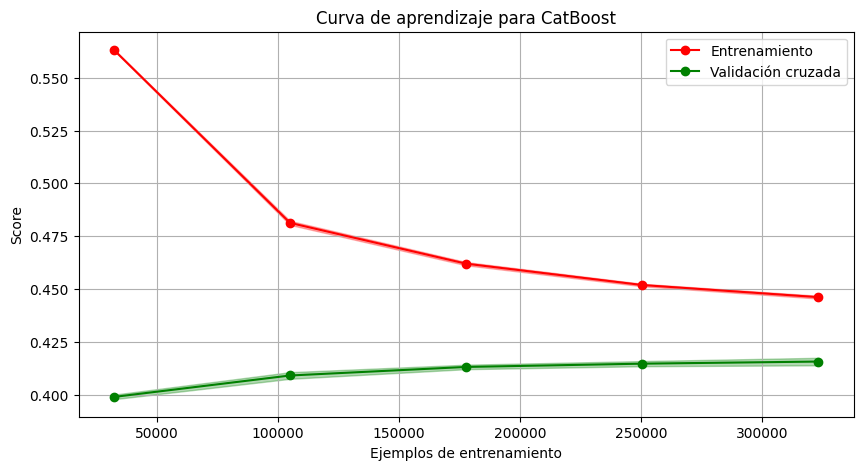

In [ ]:
plot_learning_curve(estimator2, 'Curva de aprendizaje para CatBoost', Xtr, ytr, cv=3)
plt.show()

In [ ]:
CBC = CatBoostClassifier()

# Entrenar el modelo
CBC.fit(Xtr, ytr)


Learning rate set to 0.108464
0:	learn: 1.3676491	total: 116ms	remaining: 1m 55s
1:	learn: 1.3535318	total: 220ms	remaining: 1m 49s
2:	learn: 1.3419865	total: 323ms	remaining: 1m 47s
3:	learn: 1.3324951	total: 420ms	remaining: 1m 44s
4:	learn: 1.3242562	total: 521ms	remaining: 1m 43s
5:	learn: 1.3174010	total: 617ms	remaining: 1m 42s
6:	learn: 1.3119717	total: 716ms	remaining: 1m 41s
7:	learn: 1.3065968	total: 810ms	remaining: 1m 40s
8:	learn: 1.3019381	total: 908ms	remaining: 1m 39s
9:	learn: 1.2981176	total: 997ms	remaining: 1m 38s
10:	learn: 1.2938984	total: 1.1s	remaining: 1m 39s
11:	learn: 1.2905910	total: 1.2s	remaining: 1m 38s
12:	learn: 1.2873886	total: 1.31s	remaining: 1m 39s
13:	learn: 1.2846604	total: 1.4s	remaining: 1m 38s
14:	learn: 1.2820865	total: 1.5s	remaining: 1m 38s
15:	learn: 1.2798968	total: 1.59s	remaining: 1m 37s
16:	learn: 1.2778808	total: 1.69s	remaining: 1m 37s
17:	learn: 1.2758603	total: 1.79s	remaining: 1m 37s
18:	learn: 1.2742050	total: 1.89s	remaining: 1m 

In [ ]:
# Evaluar el modelo
train_acc = CBC.score(Xtr, ytr)
test_acc = CBC.score(Xts, yts)

print("Train Accuracy:", train_acc)
print("Test Accuracy:", test_acc)

Train Accuracy: 0.43909231562661166
Test Accuracy: 0.4179638989169675


In [ ]:
preds = CBC.predict(X_test)

In [ ]:
preds = preds.ravel()
preds

array([1., 2., 3., ..., 2., 3., 3.])

In [ ]:
preds.shape, test.shape

((296786,), (296786, 90))

In [ ]:
idTest = pd.DataFrame(test["ID"])

Reference = ['bajo', 'medio-bajo', 'medio-alto', 'alto']
y_predictionReference = [Reference[int(i)] for i in preds]

idTest['RENDIMIENTO_GLOBAL'] = pd.Series(y_predictionReference, name='RENDIMIENTO_GLOBAL')

In [ ]:
idTest.head()

,ID,RENDIMIENTO_GLOBAL
0,550236,medio-bajo
1,98545,medio-alto
2,499179,alto
3,782980,bajo
4,785185,bajo


In [ ]:
idTest.to_csv('submission.csv', index=False)

In [ ]:
!head submission.csv

ID,RENDIMIENTO_GLOBAL
550236,medio-bajo
98545,medio-alto
499179,alto
782980,bajo
785185,bajo
58495,medio-bajo
705444,alto
557548,alto
519909,bajo
